# Did Moneyball Work for the Oakland A's?

## Part 1: Wrangling

### Problem 1: Use SQL to compute a relation containing the total payroll and winning percentage for each team

In [11]:
import sqlite3
import pandas
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Access sqlite database
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

# Get search query results
salary_query = "SELECT teamID, yearID, sum(salary)/1000 as total_payroll_thousands FROM Salaries GROUP BY teamID, yearID"

team_query = "SELECT (W*100/G) as winning_percentage, W, G, *  FROM TEAMS GROUP BY teamID, yearID"

# Build Panda Dataframes
team_salaries = pandas.read_sql(salary_query, conn)

team_data = pandas.read_sql(team_query, conn)

# Outer Merge
df = pandas.merge(team_salaries, team_data, how = 'outer', on = ['teamID', 'yearID'])

# Display Results
df

,teamID,yearID,total_payroll_thousands,winning_percentage,W,G,lgID,franchID,divID,Rank,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,ATL,1985,14807.000,40.0,66.0,162.0,NL,ATL,W,5.0,...,197.0,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105.0,106.0,ATL,ATL,ATL
1,BAL,1985,11560.712,51.0,83.0,161.0,AL,BAL,E,4.0,...,168.0,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97.0,97.0,BAL,BAL,BAL
2,BOS,1985,10897.560,49.0,81.0,163.0,AL,BOS,E,5.0,...,161.0,0.97,Boston Red Sox,Fenway Park II,1786633.0,104.0,104.0,BOS,BOS,BOS
3,CAL,1985,14427.894,55.0,90.0,162.0,AL,ANA,W,2.0,...,202.0,0.98,California Angels,Anaheim Stadium,2567427.0,100.0,100.0,CAL,CAL,CAL
4,CHA,1985,9846.178,52.0,85.0,163.0,AL,CHW,W,3.0,...,152.0,0.98,Chicago White Sox,Comiskey Park,1669888.0,104.0,104.0,CHW,CHA,CHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,WS8,1887,NaN,36.0,46.0,126.0,NL,WNL,None,7.0,...,NaN,0.91,Washington Nationals,Swampdoodle Grounds,NaN,95.0,100.0,WHS,WS8,WS8
2773,WS8,1888,NaN,35.0,48.0,136.0,NL,WNL,None,8.0,...,NaN,0.91,Washington Nationals,Swampdoodle Grounds,NaN,94.0,98.0,WHS,WS8,WS8
2774,WS8,1889,NaN,32.0,41.0,127.0,NL,WNL,None,8.0,...,NaN,0.90,Washington Nationals,Swampdoodle Grounds,NaN,94.0,98.0,WHS,WS8,WS8
2775,WS9,1891,NaN,31.0,44.0,139.0,AA,WAS,None,9.0,...,NaN,0.90,Washington Statesmen,Boundary Field,NaN,95.0,100.0,WAS,WS9,WS9


In [12]:
# Note on missing data:
# When looking at the joined data frame between the two query results, it appears to have a significant amount of missing
# data. I chose to ignore teams that have missing payroll data because it didn't seem necessary to include them. The payroll
# data is only availible for teams from 1985-2014 so anything before that will be ignored. To accomplish this I used 
# an outer join. 

## Part 2: Exploratory Data Analysis

### Payroll Distribution

### Problem 2 : Illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014)

Text(0.5, 1.0, 'Distribution of League Payrolls (1990-2014)')

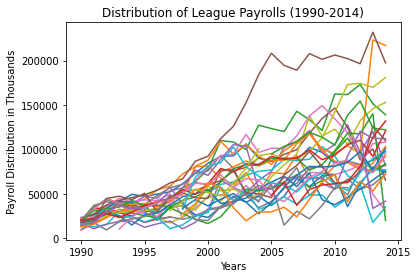

In [13]:
# Create new data frame from years 1990-2014
df2 = df[df['yearID'] >= 1990]

# Get Team names
team_names = df2['teamID'].drop_duplicates()

# Create line graph
# rescale y-axis
for name in team_names:
    temp_df = df2[df2['teamID'] == name]
    plt.plot(temp_df['yearID'], temp_df['total_payroll_thousands'])
    

plt.xlabel("Years")
plt.ylabel("Payroll Distribution in Thousands")
plt.title("Distribution of League Payrolls (1990-2014)")

In [14]:
# Question 1:
# What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you 
# can make statements in terms of central tendency, spread, etc 
#
# Response: 
# The graph above shows the distribution of payrolls (in thousands) across all teams over time one basic oberservation is 
# that the total money spent seems to increase over time. This could be due to a variety of reasons like inflation, etc. 
# What I also noticed is that from the years 1990-1995, the teams seemed to have generally similar salaries and that over 
# time the gaps between these teams increase significantly. However, it seems players on ALL teams tend to make more money 
# over time. 

### Problem 3 : Find average salary increase over years

Text(0.5, 1.0, 'Average Salary Increase Overtime')

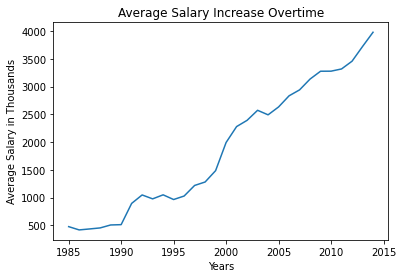

In [15]:
# let's find the average salary increase over the years as we asked in Question 1
mean_query = "SELECT yearID, ((sum(salary)/count(salary))/1000) as salary_mean_in_thousands FROM Salaries GROUP BY yearID"
mean_table = pandas.read_sql(mean_query,conn)
plt.plot(mean_table['yearID'], mean_table['salary_mean_in_thousands'])
plt.xlabel("Years")
plt.ylabel("Average Salary in Thousands")
plt.title("Average Salary Increase Overtime")

## Correlation Between Payroll and Winning Percentage

### Problem 4: Write code to discretize year into five time periods and then make a scatterplot showing mean winning percentage vs mean payroll for each of the five time periods.

In [16]:
# Create a new dataframe that contains only the data we need
new_salary_query = "SELECT  teamID,yearID, ((sum(salary)/count(salary))/1000) as payroll_mean_in_thousands FROM Salaries GROUP BY teamID,yearID"
new_mean_query = "SELECT  teamID,yearID, W*100/G as winning_percentage FROM Teams GROUP BY teamID,yearID"
salary_table2 = pandas.read_sql(new_salary_query, conn)
mean_table2 = pandas.read_sql(new_mean_query,conn)

df3 = pandas.merge(salary_table2, mean_table2, how='outer', on=['yearID','teamID'])

In [17]:
# Declare bins for cutting
bins = [1989,1994,1999,2004,2009,2015]

# Define group bounds
period_names = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']

# Cut time periods
time_periods = pandas.cut(df2['yearID'], bins, labels=period_names) 
df3['time_periods'] = pandas.cut(df3['yearID'], bins, labels=period_names)


periods = df3.groupby('time_periods')

period1 = periods.get_group('1990-1994')
period2 = periods.get_group('1995-1999')
period3 = periods.get_group('2000-2004')
period4 = periods.get_group('2005-2009')
period5 = periods.get_group('2010-2015')

Text(0.5, 1.0, 'Win Percentage vs Mean Salary 1990-1994')

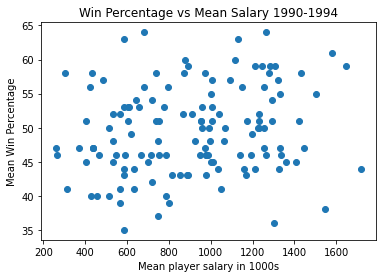

In [18]:
# 1990 - 1994
plt.scatter(period1['payroll_mean_in_thousands'], period1['winning_percentage'])
plt.xlabel("Mean player salary in 1000s")
plt.ylabel("Mean Win Percentage")
plt.title("Win Percentage vs Mean Salary 1990-1994")

Text(0.5, 1.0, 'Win Percentage vs Mean Salary 1995-1999')

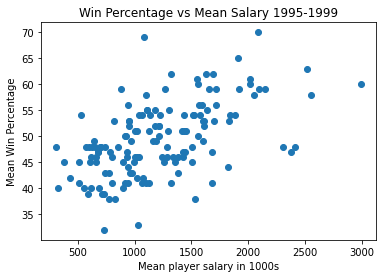

In [19]:
# 1995 - 1999
plt.scatter(period2['payroll_mean_in_thousands'], period2['winning_percentage'])
plt.xlabel("Mean player salary in 1000s")
plt.ylabel("Mean Win Percentage")
plt.title("Win Percentage vs Mean Salary 1995-1999")

Text(0.5, 1.0, 'Win Percentage vs Mean Salary 2000-2004')

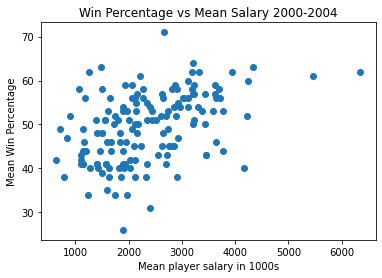

In [20]:
# 2000 - 2004
plt.scatter(period3['payroll_mean_in_thousands'], period3['winning_percentage'])
plt.xlabel("Mean player salary in 1000s")
plt.ylabel("Mean Win Percentage")
plt.title("Win Percentage vs Mean Salary 2000-2004")

Text(0.5, 1.0, 'Win Percentage vs Mean Salary 2005-2009')

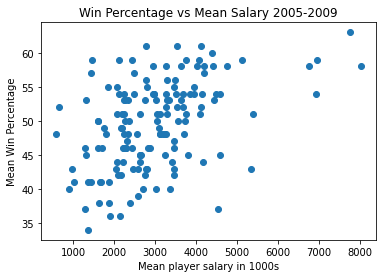

In [21]:
# 2005 - 2009
plt.scatter(period4['payroll_mean_in_thousands'], period4['winning_percentage'])
plt.xlabel("Mean player salary in 1000s")
plt.ylabel("Mean Win Percentage")
plt.title("Win Percentage vs Mean Salary 2005-2009")

Text(0.5, 1.0, 'Win Percentage vs Mean Salary 2010-2015')

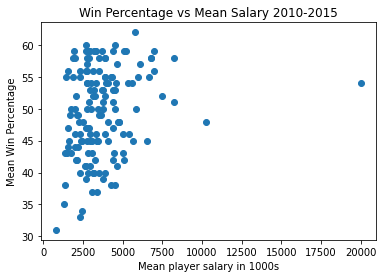

In [22]:
# 2010 - 2015
plt.scatter(period5['payroll_mean_in_thousands'], period5['winning_percentage'])
plt.xlabel("Mean player salary in 1000s")
plt.ylabel("Mean Win Percentage")
plt.title("Win Percentage vs Mean Salary 2010-2015")

In [23]:
# Question 2:
# What can you say about team payrolls across these periods? Are there any teams that 
# standout as being particularly good at paying for wins across these time periods? 
# What can you say about the Oakland A's spending efficiency across these time periods 
# (labeling points in the scatterplot can help interpretation).
#
# Answer: 
# By looking at the data in each period data set then comparing it to the scatter plot data, it appears that the New York
# Yankees and the Boston Redsoxs have consistently high win rates, with high mean player salary rates. While the Oakland
# A's spending efficency seems to consistently be lower while still retaining average winrates. 

# Part 3: Data Transformations

## Standardizing Across Years

### Problem 5 : Create a new variable in your dataset that standardizes payroll conditioned on year 

In [24]:
# Create a new data set for the years 1985-2014
df4 = df3[df3['yearID'] >= 1985]

# Set current year
curr_year = 1985

# Array to calculate means and stdev
calculate = []

# Dicts to store means and stdevs 
payroll_mean_by_year = {}
payroll_std_by_year = {}

# Calculate
for index, row in df4.iterrows():
    if curr_year == row['yearID']:
        calculate.append(row['payroll_mean_in_thousands'])
    else:
        mean = statistics.mean(calculate)
        std = statistics.stdev(calculate)
        payroll_mean_by_year[curr_year] = mean
        payroll_std_by_year[curr_year] = std
        curr_year = curr_year + 1
        calculate = []

# Get last year
payroll_mean_by_year[curr_year] = statistics.mean(calculate)
payroll_std_by_year[curr_year] = statistics.stdev(calculate)

standarized = []

# Calculate standardized Payroll
for index, row in df4.iterrows():
    standarized.append((row['payroll_mean_in_thousands'] - payroll_mean_by_year[row['yearID']]) / payroll_std_by_year[row['yearID']])
    
df4['standardized'] = standarized

# Display new data frame
df4

c:\users\liame\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,teamID,yearID,payroll_mean_in_thousands,winning_percentage,time_periods,standardized
0,ATL,1985,673.045455,40.0,NaN,1.946823
1,BAL,1985,525.486909,51.0,NaN,0.500248
2,BOS,1985,435.902400,49.0,NaN,-0.377984
3,CAL,1985,515.281929,55.0,NaN,0.400205
4,CHA,1985,468.865619,52.0,NaN,-0.054832
...,...,...,...,...,...,...
855,SLN,2014,4310.464286,55.0,2010-2015,-0.095956
856,TBA,2014,2907.564000,47.0,2010-2015,-0.508356
857,TEX,2014,4677.294125,41.0,2010-2015,0.011879
858,TOR,2014,4396.804000,51.0,2010-2015,-0.070575


### Problem 6: Repeat the same plots as Problem 4, but use this new standardized payroll variable

In [25]:
# Declare bins for cutting
bins = [1989,1994,1999,2004,2009,2015]

# Define group bounds
period_names = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']

# Cut time periods
time_periods = pandas.cut(df4['yearID'], bins, labels=period_names) 


periods = df4.groupby('time_periods')

period1 = periods.get_group('1990-1994')
period2 = periods.get_group('1995-1999')
period3 = periods.get_group('2000-2004')
period4 = periods.get_group('2005-2009')
period5 = periods.get_group('2010-2015')

Text(0.5, 1.0, 'Win Percentage vs Standarization 1990-1994')

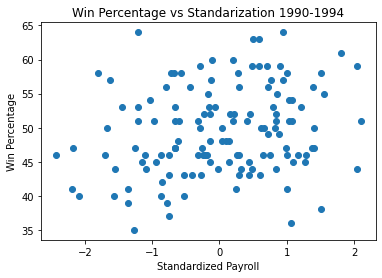

In [26]:
# 1990 - 1994
plt.scatter(period1['standardized'], period1['winning_percentage'])
plt.xlabel("Standardized Payroll")
plt.ylabel("Win Percentage")
plt.title("Win Percentage vs Standarization 1990-1994")

Text(0.5, 1.0, 'Win Percentage vs Standarization 1995-1999')

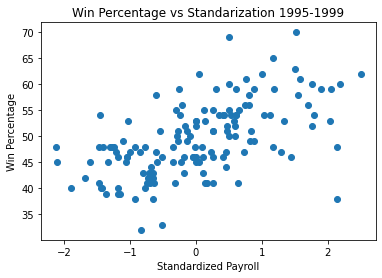

In [27]:
# 1995 - 1999
plt.scatter(period2['standardized'], period2['winning_percentage'])
plt.xlabel("Standardized Payroll")
plt.ylabel("Win Percentage")
plt.title("Win Percentage vs Standarization 1995-1999")

Text(0.5, 1.0, 'Win Percentage vs Standarization 2000-2004')

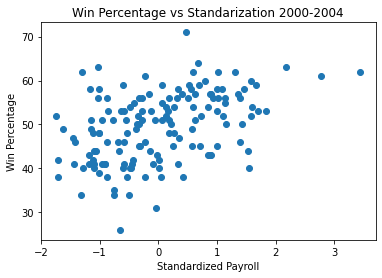

In [28]:
# 2000 - 2004
plt.scatter(period3['standardized'], period3['winning_percentage'])
plt.xlabel("Standardized Payroll")
plt.ylabel("Win Percentage")
plt.title("Win Percentage vs Standarization 2000-2004")

Text(0.5, 1.0, 'Win Percentage vs Standarization 2005-2009')

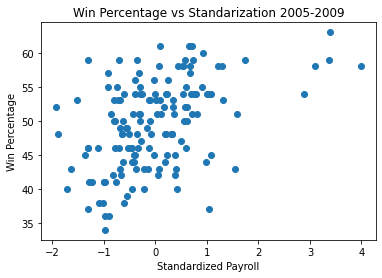

In [29]:
# 2005 - 2009
plt.scatter(period4['standardized'], period4['winning_percentage'])
plt.xlabel("Standardized Payroll")
plt.ylabel("Win Percentage")
plt.title("Win Percentage vs Standarization 2005-2009")

Text(0.5, 1.0, 'Win Percentage vs Standarization 2010-2014')

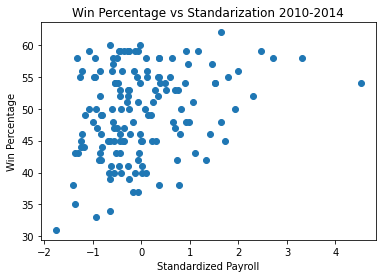

In [30]:
# 2010 - 2014
plt.scatter(period5['standardized'], period5['winning_percentage'])
plt.xlabel("Standardized Payroll")
plt.ylabel("Win Percentage")
plt.title("Win Percentage vs Standarization 2010-2014")

In [31]:
# Question 3:
# So what we've done here is transform the mean payroll to be at zero (x-axis) and moved the win percentage to the y-axis
# such that the standard deviation is now 1. So now we can see if a data point is above or below the average pay (x-axis)
# and compare it to the winning percentage on the y-axis. Before, the plots in problem four relied on all independent data
# (i.e. their own salary means) which made it hard to compare to others because it was difficult to find exactly what
# was considered above and below average. However, here it's easy to tell how high or low a teams mean payroll is and how it 
# correlates to win percentage because we standarized it. 

## Expected Wins

### Problem 7: Make a scatter plot of winning percentage vs standardized payroll, then add a regression line to highlight the relationship.

In [32]:
# Expected wins = 50 + 2.5 * standardized pay
df4['expected_win_percent'] = 50 + 2.5 * df4['standardized']

c:\users\liame\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Expected Wining Percentage vs Standardized Payroll')

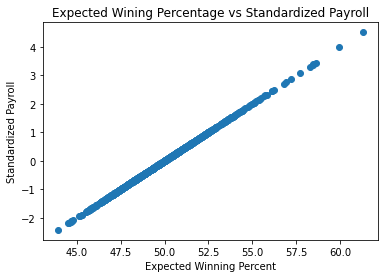

In [33]:
# Plot expected wins
plt.scatter(df4['expected_win_percent'],df4['standardized'])
plt.xlabel("Expected Winning Percent")
plt.ylabel("Standardized Payroll")
plt.title("Expected Wining Percentage vs Standardized Payroll")

## Spending Efficiency

### Problem 8: Create a new field to compute each teams spending efficiency

In [34]:
df4['efficency'] = df4['winning_percentage'] - df4['expected_win_percent']

c:\users\liame\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Spending Efficency Over the Years')

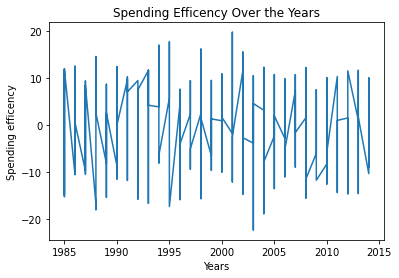

In [35]:
plt.plot(df4['yearID'], df4['efficency'])
plt.xlabel("Years")
plt.ylabel("Spending efficency")
plt.title("Spending Efficency Over the Years")

In [36]:
# Question 4:
# What can you learn from this plot compared to the set of plots you looked at in 
# Question 2 and 3? How good was Oakland's efficiency during the Moneyball period?
#
# Answer:
# When looking at this graph it appears that teams who spend more money typically
# perform better overall. During the Moneyball period the Oakland A's had relative 
# Success to little spending. 